In [89]:
import subprocess
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

from sklearn.linear_model import LinearRegression

from pyopenms import *

In [5]:
feat_tab = pd.read_csv('feat_finding/features_010.csv')

feat_tab.head()

,row ID,row m/z,row retention time,010_1_DIL4_MS1_POS_18_09_19_1-22_01_10028.mzXML Peak area,010_1_DIL4_MS1_POS_18_09_19_1-22_01_10028.mzXML Peak m/z min,010_1_DIL4_MS1_POS_18_09_19_1-22_01_10028.mzXML Peak m/z max,010_1_DIL3_MS1_POS_18_09_19_1-23_01_10029.mzXML Peak area,010_1_DIL3_MS1_POS_18_09_19_1-23_01_10029.mzXML Peak m/z min,010_1_DIL3_MS1_POS_18_09_19_1-23_01_10029.mzXML Peak m/z max,010_1_DIL2_MS1_POS_18_09_19_1-24_01_10030.mzXML Peak area,...,010_2_DIL1_MS1_POS_18_09_19_1-30_01_10049.mzXML Peak area,010_2_DIL1_MS1_POS_18_09_19_1-30_01_10049.mzXML Peak m/z min,010_2_DIL1_MS1_POS_18_09_19_1-30_01_10049.mzXML Peak m/z max,010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzXML Peak area,010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzXML Peak m/z min,010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzXML Peak m/z max,010_2_ORIG_MS1_POS_18_09_19_1-31_01_10050.mzXML Peak area,010_2_ORIG_MS1_POS_18_09_19_1-31_01_10050.mzXML Peak m/z min,010_2_ORIG_MS1_POS_18_09_19_1-31_01_10050.mzXML Peak m/z max,Unnamed: 27
0,1,158.963948,55.019083,1.216098e+08,158.960556,158.964844,1.232941e+08,158.960602,158.964615,1.227249e+08,...,1.138920e+08,158.961044,158.964401,1.236087e+08,158.961319,158.964325,1.176160e+08,158.961411,158.964783,NaN
1,2,430.913475,55.010729,6.678884e+07,430.909912,430.916229,6.716092e+07,430.909943,430.916138,6.829802e+07,...,6.217709e+07,430.909912,430.915924,6.801420e+07,430.910004,430.916290,6.774835e+07,430.910522,430.916565,NaN
2,3,338.340631,39.634563,4.146274e+06,338.336792,338.341705,6.336713e+06,338.337677,338.342621,8.273540e+06,...,2.252285e+06,338.338013,338.341705,1.343144e+07,338.338165,338.344330,0.000000e+00,338.340851,338.340851,NaN
3,4,550.623606,40.773271,9.703602e+06,550.618164,550.630676,1.035002e+07,550.617920,550.628723,1.070345e+07,...,2.618185e+04,550.619446,550.622559,1.192657e+07,550.617981,550.626770,0.000000e+00,550.620239,550.620239,NaN
4,5,291.244088,31.852389,9.027793e+06,291.240448,291.244659,1.472724e+07,291.241791,291.246216,7.111868e+06,...,0.000000e+00,0.000000,0.000000,9.555513e+06,291.243195,291.247131,0.000000e+00,0.000000,0.000000,NaN


In [33]:
feat_area = feat_tab.copy()[feat_tab.columns[feat_tab.columns.str.contains('Peak area')]]

feat_area.head()

,010_1_DIL4_MS1_POS_18_09_19_1-22_01_10028.mzXML Peak area,010_1_DIL3_MS1_POS_18_09_19_1-23_01_10029.mzXML Peak area,010_1_DIL2_MS1_POS_18_09_19_1-24_01_10030.mzXML Peak area,010_2_DIL2_MS1_POS_b_18_09_19_1-29_01_10048.mzXML Peak area,010_1_DIL1_MS1_POS_18_09_19_1-25_01_10031.mzXML Peak area,010_2_DIL1_MS1_POS_18_09_19_1-30_01_10049.mzXML Peak area,010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzXML Peak area,010_2_ORIG_MS1_POS_18_09_19_1-31_01_10050.mzXML Peak area
0,1.216098e+08,1.232941e+08,1.227249e+08,1.153370e+08,1.230115e+08,1.138920e+08,1.236087e+08,1.176160e+08
1,6.678884e+07,6.716092e+07,6.829802e+07,6.616223e+07,6.675091e+07,6.217709e+07,6.801420e+07,6.774835e+07
2,4.146274e+06,6.336713e+06,8.273540e+06,1.194610e+06,1.070936e+07,2.252285e+06,1.343144e+07,0.000000e+00
3,9.703602e+06,1.035002e+07,1.070345e+07,4.478000e+04,1.126330e+07,2.618185e+04,1.192657e+07,0.000000e+00
4,9.027793e+06,1.472724e+07,7.111868e+06,3.515000e+02,8.696732e+06,0.000000e+00,9.555513e+06,0.000000e+00


In [14]:
feat_area.columns.str.replace('.mzXML Peak area', '').str.split('_').tolist()

/tmp/ipykernel_532091/1539461663.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  feat_area.columns.str.replace('.mzXML Peak area', '').str.split('_').tolist()


[['010', '1', 'DIL4', 'MS1', 'POS', '18', '09', '19', '1-22', '01', '10028'],
 ['010', '1', 'DIL3', 'MS1', 'POS', '18', '09', '19', '1-23', '01', '10029'],
 ['010', '1', 'DIL2', 'MS1', 'POS', '18', '09', '19', '1-24', '01', '10030'],
 ['010',
  '2',
  'DIL2',
  'MS1',
  'POS',
  'b',
  '18',
  '09',
  '19',
  '1-29',
  '01',
  '10048'],
 ['010', '1', 'DIL1', 'MS1', 'POS', '18', '09', '19', '1-25', '01', '10031'],
 ['010', '2', 'DIL1', 'MS1', 'POS', '18', '09', '19', '1-30', '01', '10049'],
 ['010', '1', 'ORIG', 'MS1', 'POS', '18', '09', '19', '1-26', '01', '10032'],
 ['010', '2', 'ORIG', 'MS1', 'POS', '18', '09', '19', '1-31', '01', '10050']]

In [28]:
meta = feat_area.columns.str.replace('.mzXML Peak area', '').str.split('_').tolist()
meta = [x[2] for x in meta]
        
meta

/tmp/ipykernel_532091/4269665227.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  meta = feat_area.columns.str.replace('.mzXML Peak area', '').str.split('_').tolist()


['DIL4', 'DIL3', 'DIL2', 'DIL2', 'DIL1', 'DIL1', 'ORIG', 'ORIG']

In [18]:
len(meta)

8

In [20]:
feat_area.shape

(82299, 8)

In [24]:
feat_area.head().apply(lambda a: a/a.sum()).sum()

010_1_DIL4_MS1_POS_18_09_19_1-22_01_10028.mzXML Peak area      1.0
010_1_DIL3_MS1_POS_18_09_19_1-23_01_10029.mzXML Peak area      1.0
010_1_DIL2_MS1_POS_18_09_19_1-24_01_10030.mzXML Peak area      1.0
010_2_DIL2_MS1_POS_b_18_09_19_1-29_01_10048.mzXML Peak area    1.0
010_1_DIL1_MS1_POS_18_09_19_1-25_01_10031.mzXML Peak area      1.0
010_2_DIL1_MS1_POS_18_09_19_1-30_01_10049.mzXML Peak area      1.0
010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzXML Peak area      1.0
010_2_ORIG_MS1_POS_18_09_19_1-31_01_10050.mzXML Peak area      1.0
dtype: float64

In [26]:
feat_area.head().apply(lambda a: a/a.sum()).iloc[:,0].sum()

1.0

In [34]:
feat_area = feat_area.apply(lambda a: a/a.sum())

feat_area.iloc[:,0].sum()

0.9999999999999997

In [35]:
feat_area = feat_area.T
feat_area.reset_index(inplace=True, drop=True)
feat_area['Groups'] = meta

feat_area

,0,1,2,3,4,5,6,7,8,9,...,82290,82291,82292,82293,82294,82295,82296,82297,82298,Groups
0,0.156958,0.086202,0.005351,0.012524,1.165189e-02,0.026284,0.008679,0.004442,0.006262,0.006230,...,6.517875e-08,1.064801e-07,6.453341e-08,2.287774e-07,1.529442e-07,2.711436e-07,1.632695e-07,1.755309e-07,3.207311e-07,DIL4
1,0.123120,0.067066,0.006328,0.010335,1.470643e-02,0.020605,0.006804,0.005872,0.004250,0.004872,...,4.843148e-08,1.447951e-08,7.139898e-08,1.612718e-07,1.467474e-07,2.621291e-07,0.000000e+00,1.962224e-07,2.395361e-07,DIL3
2,0.101906,0.056712,0.006870,0.008888,5.905409e-03,0.017475,0.005290,0.007986,0.002580,0.004064,...,6.435289e-08,3.072331e-08,7.639310e-08,2.474472e-07,2.549205e-07,3.263314e-07,0.000000e+00,2.918549e-07,3.944209e-07,DIL2
3,0.059091,0.033897,0.000612,0.000023,1.800841e-07,0.010876,0.000000,0.000000,0.000013,0.002968,...,5.545977e-07,0.000000e+00,6.916461e-08,2.426397e-06,0.000000e+00,3.419806e-07,2.025831e-07,3.834793e-07,2.131712e-06,DIL2
4,0.063653,0.034541,0.005542,0.005828,4.500198e-03,0.010837,0.003132,0.007403,0.000731,0.002573,...,1.192742e-07,2.613166e-08,4.139668e-08,1.593772e-07,2.033612e-07,3.474734e-07,0.000000e+00,1.562673e-07,2.106211e-07,DIL1


In [36]:
feat_area

,0,1,2,3,4,5,6,7,8,9,...,82290,82291,82292,82293,82294,82295,82296,82297,82298,Groups
0,0.156958,0.086202,0.005351,0.012524,1.165189e-02,0.026284,8.678722e-03,0.004442,6.262093e-03,0.006230,...,6.517875e-08,1.064801e-07,6.453341e-08,2.287774e-07,1.529442e-07,2.711436e-07,1.632695e-07,1.755309e-07,3.207311e-07,DIL4
1,0.123120,0.067066,0.006328,0.010335,1.470643e-02,0.020605,6.804337e-03,0.005872,4.250468e-03,0.004872,...,4.843148e-08,1.447951e-08,7.139898e-08,1.612718e-07,1.467474e-07,2.621291e-07,0.000000e+00,1.962224e-07,2.395361e-07,DIL3
2,0.101906,0.056712,0.006870,0.008888,5.905409e-03,0.017475,5.290164e-03,0.007986,2.579702e-03,0.004064,...,6.435289e-08,3.072331e-08,7.639310e-08,2.474472e-07,2.549205e-07,3.263314e-07,0.000000e+00,2.918549e-07,3.944209e-07,DIL2
3,0.059091,0.033897,0.000612,0.000023,1.800841e-07,0.010876,0.000000e+00,0.000000,1.256629e-05,0.002968,...,5.545977e-07,0.000000e+00,6.916461e-08,2.426397e-06,0.000000e+00,3.419806e-07,2.025831e-07,3.834793e-07,2.131712e-06,DIL2
4,0.063653,0.034541,0.005542,0.005828,4.500198e-03,0.010837,3.131673e-03,0.007403,7.312864e-04,0.002573,...,1.192742e-07,2.613166e-08,4.139668e-08,1.593772e-07,2.033612e-07,3.474734e-07,0.000000e+00,1.562673e-07,2.106211e-07,DIL1
5,0.026736,0.014596,0.000529,0.000006,0.000000e+00,0.004801,0.000000e+00,0.000000,1.823059e-06,0.001332,...,1.403224e-06,0.000000e+00,0.000000e+00,1.362131e-07,8.054895e-07,2.822881e-07,1.011660e-06,5.486719e-07,1.593159e-06,DIL1
6,0.042953,0.023634,0.004667,0.004144,3.320456e-03,0.007331,2.033243e-03,0.006859,1.663784e-04,0.001712,...,1.164095e-07,0.000000e+00,0.000000e+00,1.546006e-07,7.731679e-08,3.433213e-07,0.000000e+00,1.763518e-07,9.350987e-07,ORIG
7,0.015196,0.008753,0.000000,0.000000,0.000000e+00,0.002875,2.041960e-07,0.000000,1.928912e-07,0.000785,...,0.000000e+00,9.445907e-07,7.687871e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,ORIG


In [37]:
feat_area.groupby('Groups').mean()

,0,1,2,3,4,5,6,7,8,9,...,82289,82290,82291,82292,82293,82294,82295,82296,82297,82298
Groups,,,,,,,,,,,,,,,,,,,,,
DIL1,0.045195,0.024568,0.003035,0.002917,0.002250,0.007819,0.001566,0.003702,0.000367,0.001952,...,1.273768e-07,7.612493e-07,1.306583e-08,2.069834e-08,1.477952e-07,5.044254e-07,3.148808e-07,5.058298e-07,3.524696e-07,9.018901e-07
DIL2,0.080498,0.045304,0.003741,0.004455,0.002953,0.014175,0.002645,0.003993,0.001296,0.003516,...,1.214157e-07,3.094753e-07,1.536166e-08,7.277886e-08,1.336922e-06,1.274602e-07,3.341560e-07,1.012916e-07,3.376671e-07,1.263067e-06
DIL3,0.123120,0.067066,0.006328,0.010335,0.014706,0.020605,0.006804,0.005872,0.004250,0.004872,...,4.185578e-08,4.843148e-08,1.447951e-08,7.139898e-08,1.612718e-07,1.467474e-07,2.621291e-07,0.000000e+00,1.962224e-07,2.395361e-07
DIL4,0.156958,0.086202,0.005351,0.012524,0.011652,0.026284,0.008679,0.004442,0.006262,0.006230,...,4.065605e-08,6.517875e-08,1.064801e-07,6.453341e-08,2.287774e-07,1.529442e-07,2.711436e-07,1.632695e-07,1.755309e-07,3.207311e-07
ORIG,0.029074,0.016194,0.002334,0.002072,0.001660,0.005103,0.001017,0.003430,0.000083,0.001249,...,2.019699e-07,5.820477e-08,4.722954e-07,3.843935e-07,7.730028e-08,3.865839e-08,1.716606e-07,0.000000e+00,8.817589e-08,4.675494e-07


In [39]:
feat_area.loc[feat_area.Groups=='DIL1', 0].mean()

0.04519482153165339

In [40]:
feat_area = feat_area.groupby('Groups').mean()

feat_area

,0,1,2,3,4,5,6,7,8,9,...,82289,82290,82291,82292,82293,82294,82295,82296,82297,82298
Groups,,,,,,,,,,,,,,,,,,,,,
DIL1,0.045195,0.024568,0.003035,0.002917,0.002250,0.007819,0.001566,0.003702,0.000367,0.001952,...,1.273768e-07,7.612493e-07,1.306583e-08,2.069834e-08,1.477952e-07,5.044254e-07,3.148808e-07,5.058298e-07,3.524696e-07,9.018901e-07
DIL2,0.080498,0.045304,0.003741,0.004455,0.002953,0.014175,0.002645,0.003993,0.001296,0.003516,...,1.214157e-07,3.094753e-07,1.536166e-08,7.277886e-08,1.336922e-06,1.274602e-07,3.341560e-07,1.012916e-07,3.376671e-07,1.263067e-06
DIL3,0.123120,0.067066,0.006328,0.010335,0.014706,0.020605,0.006804,0.005872,0.004250,0.004872,...,4.185578e-08,4.843148e-08,1.447951e-08,7.139898e-08,1.612718e-07,1.467474e-07,2.621291e-07,0.000000e+00,1.962224e-07,2.395361e-07
DIL4,0.156958,0.086202,0.005351,0.012524,0.011652,0.026284,0.008679,0.004442,0.006262,0.006230,...,4.065605e-08,6.517875e-08,1.064801e-07,6.453341e-08,2.287774e-07,1.529442e-07,2.711436e-07,1.632695e-07,1.755309e-07,3.207311e-07
ORIG,0.029074,0.016194,0.002334,0.002072,0.001660,0.005103,0.001017,0.003430,0.000083,0.001249,...,2.019699e-07,5.820477e-08,4.722954e-07,3.843935e-07,7.730028e-08,3.865839e-08,1.716606e-07,0.000000e+00,8.817589e-08,4.675494e-07


In [52]:
feat_area.index.str.replace('[^0-9]', '').str.replace('^$', '0')

/tmp/ipykernel_532091/1130553577.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  feat_area.index.str.replace('[^0-9]', '').str.replace('^$', '0')


Index(['1', '2', '3', '4', '0'], dtype='object', name='Groups')

In [89]:
y = feat_area.index.str.replace('[^0-9]', '').str.replace('^$', '0').tolist()

y = np.array([float(i) for i in y]).reshape(-1, 1)

y

/tmp/ipykernel_532091/838900981.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  y = feat_area.index.str.replace('[^0-9]', '').str.replace('^$', '0').tolist()


array([[1.],
       [2.],
       [3.],
       [4.],
       [0.]])

In [60]:
reg = LinearRegression()

In [68]:
feat_area[0].to_numpy().reshape(-1, 1)

array([[0.04519482],
       [0.08049824],
       [0.12311987],
       [0.15695791],
       [0.02907428]])

In [71]:
X = feat_area[0].to_numpy().reshape(-1, 1)
reg.fit(X, y)

LinearRegression()

In [72]:
reg.score(X, y)

0.981573775583974

In [73]:
reg.coef_ 

array([[29.41553423]])

In [99]:
reg.coef_  < 0

array([[False]])

In [101]:
reg.coef_[0][0]

29.415534226202396

In [74]:
reg.predict(X)

array([[0.77118948],
       [1.80965833],
       [3.06339652],
       [4.05876051],
       [0.29699516]])

([<matplotlib.axis.XTick at 0x7fec5827efd0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

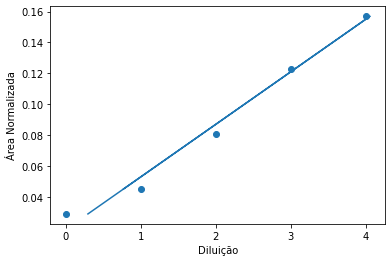

In [112]:
plt.scatter(y, X)

plt.plot(reg.predict(X), X)

plt.ylabel('Área Normalizada')
plt.xlabel('Diluição')

plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])

In [114]:
def filterReg(X, y, r2=0.9, sig='-', plot=False):
    X = X.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    sc = reg.score(X, y)
    b1 = reg.coef_[0][0]
    
    if plot:
        plt.scatter(y, X)

        plt.plot(reg.predict(X), X)

        plt.ylabel('Área Normalizada')
        plt.xlabel('Diluição')

        plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
    
    if sig=='-':
        if sc > r2 and b1 < 0:
            return 1
        else:
            return 0
    else:
        if sc > r2 and b1 > 0:
            return 1
        else:
            return 0       

In [106]:
filterReg(feat_area[0].to_numpy(), y)

0

In [107]:
sel = feat_area.apply(lambda a: filterReg(a.to_numpy(), y))

sel

0        0
1        0
2        0
3        0
4        0
        ..
82294    0
82295    0
82296    0
82297    0
82298    0
Length: 82299, dtype: int64

In [108]:
sel.sum()

1593

In [113]:
sel[sel==1]

211      1
255      1
311      1
401      1
544      1
        ..
82063    1
82093    1
82240    1
82268    1
82289    1
Length: 1593, dtype: int64

1

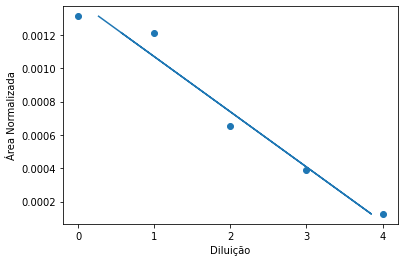

In [116]:
filterReg(feat_area[211].to_numpy(), y, plot=True)

1

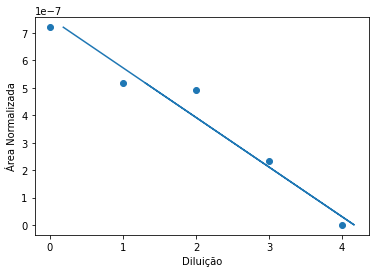

In [143]:
filterReg(feat_area[82063].to_numpy(), y, plot=True)

In [131]:
def filterFeatures(features, col_pattern='Peak area', meta=None,
                   norm=True, r2=0.9, sig='-'):
    if type(features)==str:
        feat_tab = pd.read_csv(features)
    else:
        feat_tab = features
    
    feat_area = feat_tab.copy()[feat_tab.columns[feat_tab.columns.str.contains(col_pattern)]]
    if meta is None:
        meta = feat_area.columns.str.replace('.mzXML Peak area', '').str.split('_').tolist()
        # assumes DILX dilution factor is on position 3
        meta = [x[2] for x in meta]
    
    # Normalize samples
    # scale?
    if norm:
        feat_area = feat_area.apply(lambda a: a/a.sum())
    
    # move features to columns and adds metadata
    feat_area = feat_area.T
    feat_area.reset_index(inplace=True, drop=True)
    feat_area['Groups'] = meta
    
    # Average technical replicates
    feat_area = feat_area.groupby('Groups').mean()

    # Assumes number describing increasing or decreacing ibdex for dilution
    # here ORI is used for original sample
    y = feat_area.index.str.replace('[^0-9]', '').str.replace('^$', '0').tolist()
    y = np.array([float(i) for i in y]).reshape(-1, 1)

    sel = feat_area.apply(lambda a: filterReg(a.to_numpy(), y, r2=r2, sig=sig))
    
    return sel    

In [123]:
meta is None

False

In [121]:
feat_area = feat_area.groupby('Groups').mean()

82299

In [138]:
%%time
sel.sum()

CPU times: user 1.62 ms, sys: 26 µs, total: 1.65 ms
Wall time: 5.23 ms


1593

In [132]:
%time

sel010 = filterFeatures('feat_finding/features_010.csv')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


/tmp/ipykernel_532091/2270231998.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  meta = feat_area.columns.str.replace('.mzXML Peak area', '').str.split('_').tolist()
/tmp/ipykernel_532091/2270231998.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  y = feat_area.index.str.replace('[^0-9]', '').str.replace('^$', '0').tolist()


In [133]:
sel010.sum()

1593

In [139]:
%%time
sel010ms2 = filterFeatures('feat_finding/features_ms1_ms2_010.csv')

/tmp/ipykernel_532091/2270231998.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  meta = feat_area.columns.str.replace('.mzXML Peak area', '').str.split('_').tolist()
/tmp/ipykernel_532091/2270231998.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  y = feat_area.index.str.replace('[^0-9]', '').str.replace('^$', '0').tolist()


CPU times: user 12.2 s, sys: 26.5 ms, total: 12.2 s
Wall time: 12.4 s


In [141]:
len(sel010ms2)

17660

In [142]:
sel010ms2.sum()

198

In [151]:
feat_area.apply(lambda a: a.name)

0            0
1            1
2            2
3            3
4            4
         ...  
82294    82294
82295    82295
82296    82296
82297    82297
82298    82298
Length: 82299, dtype: int64

In [17]:
class Filter:
    def __init__(self, features):
        """ Filter by regression
        Returns
        -------
        feature  :  feature file or table
        """
        self.features = features
    
            
    def formatFeatures(self, col_pattern='Peak area', meta=None, 
                       norm=True):
        if type(self.features)==str:
            feat_tab = pd.read_csv(self.features)
        else:
            feat_tab = self.features

        feat_area = feat_tab.copy()[feat_tab.columns[feat_tab.columns.str.contains(col_pattern)]]
        if meta is None:
            meta = feat_area.columns.str.replace('.mzXML Peak area', '').str.split('_').tolist()
            # assumes DILX dilution factor is on position 3
            meta = [x[2] for x in meta]

        # Normalize samples
        # scale?
        if norm:
            feat_area = feat_area.apply(lambda a: a/a.sum())

        # move features to columns and adds metadata
        feat_area = feat_area.T
        feat_area.reset_index(inplace=True, drop=True)
        feat_area['Groups'] = meta

        # Average technical replicates
        feat_area = feat_area.groupby('Groups').mean()

        # Assumes number describing increasing or decreacing ibdex for dilution
        # here ORI is used for original sample
        y = feat_area.index.str.replace('[^0-9]', '').str.replace('^$', '0').tolist()
        y = np.array([float(i) for i in y]).reshape(-1, 1)

        self.feat_tab = feat_tab
        self.feat_area = feat_area
        self.y = y 

        
    def filterReg(self, feat_idx, r2=0.9, sig='-', 
                  plot=False):
        X = self.feat_area[feat_idx].to_numpy()
        y = self.y
        
        X = X.reshape(-1, 1)
        reg = LinearRegression()
        reg.fit(X, y)
        sc = reg.score(X, y)
        b1 = reg.coef_[0][0]

        if plot:
            plt.scatter(y, X)

            plt.plot(reg.predict(X), X)

            plt.ylabel('Normalized Area')
            plt.xlabel('Dilution')

            plt.xticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
            plt.text(y[2,0], X[1,0], r"$R^2=%s$" % np.round(sc, 3))

        if sig=='-':
            if sc > r2 and b1 < 0:
                return 1
            else:
                return 0
        else:
            if sc > r2 and b1 > 0:
                return 1
            else:
                return 0
    
        
    def filterFeatures(self, r2=0.9, sig='-'):
        sel = self.feat_area.apply(lambda a: self.filterReg(a.name, r2=r2, sig=sig))
        
        self.sel = sel
        
        print('Numeber of fearures:', len(sel))
        print('Numeber of fearures after filtering:', sel.sum())    


In [4]:
samp_010 = Filter('../feat_finding/features_010.csv')
samp_010.formatFeatures()

samp_010.feat_area.shape

/tmp/ipykernel_556111/1787535912.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  meta = feat_area.columns.str.replace('.mzXML Peak area', '').str.split('_').tolist()
/tmp/ipykernel_556111/1787535912.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  y = feat_area.index.str.replace('[^0-9]', '').str.replace('^$', '0').tolist()


(5, 82299)

In [5]:
%%time

samp_010.filterFeatures()

Numeber of fearures: 82299
Numeber of fearures after filtering: 1593
CPU times: user 1min 6s, sys: 329 ms, total: 1min 6s
Wall time: 1min 7s


In [18]:
samp_010ms2 = Filter('../feat_finding/features_ms1_ms2_010.csv')
samp_010ms2.formatFeatures()

samp_010ms2.feat_area

/tmp/ipykernel_556111/389139273.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  meta = feat_area.columns.str.replace('.mzXML Peak area', '').str.split('_').tolist()
/tmp/ipykernel_556111/389139273.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  y = feat_area.index.str.replace('[^0-9]', '').str.replace('^$', '0').tolist()


,0,1,2,3,4,5,6,7,8,9,...,17650,17651,17652,17653,17654,17655,17656,17657,17658,17659
Groups,,,,,,,,,,,,,,,,,,,,,
DIL1,0.047069,0.039578,1.368751e-05,0.000200,0.000000,0.000561,0.015941,7.397666e-07,0.001084,0.000078,...,7.473325e-07,1.099596e-06,4.533948e-06,2.771329e-06,0.000000,5.518408e-07,0.000082,7.921996e-07,0.000003,3.976052e-07
DIL2,0.063089,0.054917,2.235186e-05,0.000228,0.000384,0.000132,0.021185,5.349946e-06,0.000018,0.000001,...,1.521468e-07,3.308884e-06,4.852007e-06,1.449050e-06,0.000000,2.686456e-07,0.000048,7.881447e-07,0.000006,2.976887e-05
DIL3,0.074994,0.125128,3.751401e-06,0.000185,0.000000,0.000035,0.024948,1.460994e-06,0.000004,0.000002,...,7.893619e-08,7.146854e-07,9.284399e-07,5.053285e-07,0.000000,1.121737e-07,0.000015,6.451143e-07,0.000002,1.938505e-06
DIL4,0.096498,0.097234,5.572142e-03,0.004112,0.003428,0.003013,0.032493,2.333102e-03,0.003532,0.002974,...,6.544095e-08,2.902380e-06,6.851786e-07,4.378520e-07,0.000000,1.321273e-07,0.000002,7.970637e-07,0.000000,8.497244e-06
ORIG,0.045736,0.042336,9.277003e-08,0.001364,0.000167,0.000000,0.015383,0.000000e+00,0.000929,0.000636,...,2.578365e-06,1.892756e-07,0.000000e+00,1.620035e-07,0.000008,1.082038e-06,0.000014,5.251388e-06,0.000014,0.000000e+00


In [19]:
samp_010ms2.y

array([[1.],
       [2.],
       [3.],
       [4.],
       [0.]])

In [20]:
%%time

samp_010ms2.filterFeatures()

Numeber of fearures: 17660
Numeber of fearures after filtering: 198
CPU times: user 13.4 s, sys: 55.7 ms, total: 13.4 s
Wall time: 13.5 s


In [21]:
samp_010ms2.sel[samp_010ms2.sel==1]

1371     1
2825     1
2900     1
3099     1
3196     1
        ..
17615    1
17627    1
17634    1
17636    1
17647    1
Length: 198, dtype: int64

1

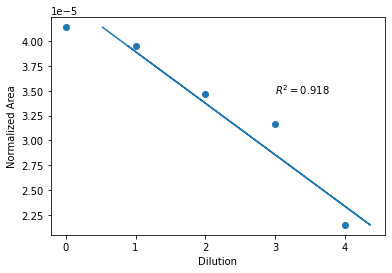

In [22]:
samp_010ms2.filterReg(1371, plot=True)

1

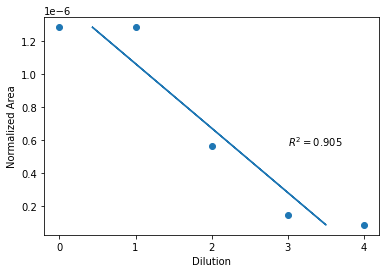

In [23]:
samp_010ms2.filterReg(17647, plot=True)

In [24]:
samp_010.feat_tab.head()

,row ID,row m/z,row retention time,010_1_DIL4_MS1_POS_18_09_19_1-22_01_10028.mzXML Peak area,010_1_DIL4_MS1_POS_18_09_19_1-22_01_10028.mzXML Peak m/z min,010_1_DIL4_MS1_POS_18_09_19_1-22_01_10028.mzXML Peak m/z max,010_1_DIL3_MS1_POS_18_09_19_1-23_01_10029.mzXML Peak area,010_1_DIL3_MS1_POS_18_09_19_1-23_01_10029.mzXML Peak m/z min,010_1_DIL3_MS1_POS_18_09_19_1-23_01_10029.mzXML Peak m/z max,010_1_DIL2_MS1_POS_18_09_19_1-24_01_10030.mzXML Peak area,...,010_2_DIL1_MS1_POS_18_09_19_1-30_01_10049.mzXML Peak area,010_2_DIL1_MS1_POS_18_09_19_1-30_01_10049.mzXML Peak m/z min,010_2_DIL1_MS1_POS_18_09_19_1-30_01_10049.mzXML Peak m/z max,010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzXML Peak area,010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzXML Peak m/z min,010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzXML Peak m/z max,010_2_ORIG_MS1_POS_18_09_19_1-31_01_10050.mzXML Peak area,010_2_ORIG_MS1_POS_18_09_19_1-31_01_10050.mzXML Peak m/z min,010_2_ORIG_MS1_POS_18_09_19_1-31_01_10050.mzXML Peak m/z max,Unnamed: 27
0,1,158.963948,55.019083,1.216098e+08,158.960556,158.964844,1.232941e+08,158.960602,158.964615,1.227249e+08,...,1.138920e+08,158.961044,158.964401,1.236087e+08,158.961319,158.964325,1.176160e+08,158.961411,158.964783,NaN
1,2,430.913475,55.010729,6.678884e+07,430.909912,430.916229,6.716092e+07,430.909943,430.916138,6.829802e+07,...,6.217709e+07,430.909912,430.915924,6.801420e+07,430.910004,430.916290,6.774835e+07,430.910522,430.916565,NaN
2,3,338.340631,39.634563,4.146274e+06,338.336792,338.341705,6.336713e+06,338.337677,338.342621,8.273540e+06,...,2.252285e+06,338.338013,338.341705,1.343144e+07,338.338165,338.344330,0.000000e+00,338.340851,338.340851,NaN
3,4,550.623606,40.773271,9.703602e+06,550.618164,550.630676,1.035002e+07,550.617920,550.628723,1.070345e+07,...,2.618185e+04,550.619446,550.622559,1.192657e+07,550.617981,550.626770,0.000000e+00,550.620239,550.620239,NaN
4,5,291.244088,31.852389,9.027793e+06,291.240448,291.244659,1.472724e+07,291.241791,291.246216,7.111868e+06,...,0.000000e+00,0.000000,0.000000,9.555513e+06,291.243195,291.247131,0.000000e+00,0.000000,0.000000,NaN


In [25]:
samp_010.sel[samp_010.sel==1]

211      1
255      1
311      1
401      1
544      1
        ..
82063    1
82093    1
82240    1
82268    1
82289    1
Length: 1593, dtype: int64

In [31]:
samp_010.feat_tab.loc[211, ['row m/z', 'row retention time']]['row m/z']

174.1303882393786

In [30]:
samp_010ms2.feat_tab['row m/z'].apply(lambda a: ((a-174.130388)/174.130388)*10**6).abs() < 15

0        False
1        False
2        False
3        False
4        False
         ...  
17655    False
17656    False
17657    False
17658    False
17659    False
Name: row m/z, Length: 17660, dtype: bool

In [29]:
samp_010ms2.feat_tab['row m/z'].head()

0    430.913528
1    158.963944
2    149.022037
3    590.423311
4    546.399689
Name: row m/z, dtype: float64

In [75]:
def matchFeats(query, ref, ppm=15, rtabs=20):
    mzdiff = ref['row m/z'].apply(lambda a: ((a-query['row m/z'])/query['row m/z'])*10**6).abs() 
    rtdiff = (ref['row retention time']-query['row retention time']).abs()
    
    diff = (mzdiff < ppm) & (rtdiff < rtabs)
    
    ans = ref.loc[diff, ['row ID', 'row m/z', 'row retention time']]
    
    if len(ans):
        ans['q-id'] = query['row ID']
        ans['q-m/z'] = query['row m/z']
        ans['q-rt'] = query['row retention time']
        ans['ppm'] = mzdiff[diff]
        ans['rtabs'] = rtdiff[diff]
        return ans
    else:
        return pd.DataFrame()

In [76]:
matchFeats(samp_010.feat_tab.loc[211, ['row ID', 'row m/z', 'row retention time']],
           samp_010ms2.feat_tab, ppm=10, rtabs=15)

,row ID,row m/z,row retention time,q-id,q-m/z,q-rt,ppm,rtabs
679,680,174.129961,44.006167,212.0,174.130388,31.199694,2.454698,12.806472
7217,7218,174.128977,42.979042,212.0,174.130388,31.199694,8.101870,11.779347
8960,8961,174.128758,45.236214,212.0,174.130388,31.199694,9.362945,14.036520
13379,13380,174.128995,45.824233,212.0,174.130388,31.199694,8.000999,14.624539


In [77]:
samp_010.feat_tab.loc[211, ['row ID', 'row m/z', 'row retention time']]

row ID                212.000000
row m/z               174.130388
row retention time     31.199694
Name: 211, dtype: float64

In [78]:
%%time 

qlist = []

for q in samp_010.sel[samp_010.sel==1].index:
    qlist.append(matchFeats(samp_010.feat_tab.loc[q, ['row ID', 'row m/z', 'row retention time']], samp_010ms2.feat_tab))

CPU times: user 3min 39s, sys: 255 ms, total: 3min 39s
Wall time: 3min 41s


In [79]:
!wc ../feat_finding/features_ms1_ms2_010.csv

  17661   17745 6854598 ../feat_finding/features_ms1_ms2_010.csv


In [80]:
!grep BEGIN ../feat_finding/ms2_010.mgf | wc

   2058    4116   22638


In [81]:
pd.concat(qlist).head()

,row ID,row m/z,row retention time,q-id,q-m/z,q-rt,ppm,rtabs
679,680,174.129961,44.006167,212.0,174.130388,31.199694,2.454698,12.806472
2450,2451,174.127885,47.614074,212.0,174.130388,31.199694,14.373962,16.414380
3129,3130,174.129147,46.746333,212.0,174.130388,31.199694,7.130340,15.546639
3197,3198,174.128564,46.873815,212.0,174.130388,31.199694,10.475446,15.674120
3295,3296,174.127989,49.010685,212.0,174.130388,31.199694,13.780685,17.810991


In [82]:
qtab = pd.concat(qlist).reset_index()

qtab.tail()

,index,row ID,row m/z,row retention time,q-id,q-m/z,q-rt,ppm,rtabs
12066,9550,9551,208.097494,45.865521,82290.0,208.097128,31.848396,1.756753,14.017125
12067,10274,10275,208.097942,45.587396,82290.0,208.097128,31.848396,3.910684,13.739000
12068,10305,10306,208.094613,45.519861,82290.0,208.097128,31.848396,12.084166,13.671465
12069,15235,15236,208.095980,46.211444,82290.0,208.097128,31.848396,5.515439,14.363049
12070,15731,15732,208.097225,45.942095,82290.0,208.097128,31.848396,0.464066,14.093699


In [83]:
len(qtab['q-id'].unique())

1093

In [84]:
qtab['q-id'].value_counts()

6026.0     522
666.0      122
13974.0     92
14148.0     91
77476.0     86
          ... 
62790.0      1
62764.0      1
73670.0      1
62205.0      1
4818.0       1
Name: q-id, Length: 1093, dtype: int64

In [106]:
qtab['q-rt'].max()

43.79483333333334

In [146]:
def mzXML2mzML(filepath):
    subprocess.run(['FileConverter', '-in', filepath, '-out', filepath.replace('mzXML', 'mzML')])

def loadExp(fname):
    exp_in = MSExperiment()
    FileHandler().loadExperiment(fname, exp_in)
    return(exp_in)

def calcTIC(exp):
     tic = 0
     for spec in exp:
         if spec.getMSLevel() == 1:
             mz, i = spec.get_peaks()
             tic += sum(i)
     return tic

def getTIC(exp):
     tic = {} 
     lmz = []
     li = []
     rt = []
     for spec in exp:
         if spec.getMSLevel() == 1:
             mz, i = spec.get_peaks()
             lmz.append(mz)
             li.append(i)
             rt.append(spec.getRT())
     tic['mz'] = lmz
     tic['i'] = li
     tic['rt'] = rt 
     return tic

def getXIC(mass, retention, tic, type='BP', rttol=20, ppm=20):
    xic = {} 
    mztol = mass/((ppm/(10**6))+1.0)
    mzdiff = abs(mztol - mass) 
    rt = np.array(tic['rt']) 
    rtidx = np.where((rt>retention-rttol) & (rt<retention+rttol)) 
    lmz = []
    lrt = []
    li = []
    lxic = []
    for idx in rtidx[0]:
        mztemp = np.array(tic['mz'][idx]) 
        itemp = np.array(tic['i'][idx]) 
        mzidx = np.where((mztemp>mass-mzdiff) & (mztemp<mass+mzdiff)) 
        if len(mzidx[0]):
            lmz += list(mztemp[mzidx])
            li += list(itemp[mzidx])
            lrt.append(rt[idx])
            if type=='TI':
                lxic.append(sum(itemp[mzidx]))
            elif type=='BP':
                if len(itemp[mzidx]):
                    lxic.append(max(itemp[mzidx]))
                else:
                    lxic.append(0)
    xic['mz'] = lmz
    xic['rt'] = lrt
    xic['i'] = li
    xic['xic'] = lxic
    return xic

def getSingleSpectrum(mgffile, scanindex):
    spectrum = {}
    f = open(mgffile)
    lines = np.array(f.readlines())
    f.close()
    bg = np.where(lines=='BEGIN IONS\n')
    ed = np.where(lines=='END IONS\n')
    p = np.where(lines=='SCANS='+str(scanindex)+'\n')
    bgp = bg[0][np.where((bg[0]-p[0])>0)[0][0]-1]
    edp = ed[0][np.where((ed[0]-p[0])>0)[0][0]]+1
    msms1 = []
    for line in lines[bgp:edp]:
        try:
            mz, rt = line.split(' ')
            msms1.append((float(mz), float(rt)))
        except:
            pass
    spectrum[scanindex] = pd.DataFrame(msms1, columns=['Mass', 'Intensity'])
    return(spectrum)


def plotXIC(mz, rt, exp, out, title='', type='XIC', format='png'):
    tic = getTIC(exp)
    xic = getXIC(mz, rt, tic, type='TI')
    if format=='pdf':
        pdf = matplotlib.backends.backend_pdf.PdfPages(out+'.pdf') 
    if type=='BPC':
        fig = plt.figure() 
        if title !='':
            fig.suptitle(title, fontsize=12)
        ax1 = fig.add_subplot(111) 
        ax1.plot(tic['rt'], [max(x) if len(x) else 0 for x in tic['i']], lw=2) 
        if format=='png':
            print('ok')
            fig.savefig(out+'.png')
        elif format=='pdf':
            pdf.savefig( fig )   
            pdf.close() 
        plt.close('all') 
    if type=='BPC_XIC':
        fig = plt.figure() 
        if title !='':
            fig.suptitle(title, fontsize=12)
        ax1 = fig.add_subplot(111) 
        ax1.plot(tic['rt'], [max(x) if len(x) else 0 for x in tic['i']], lw=2) 
        ax1.plot(xic['rt'], xic['xic'], lw=2, color='r') 
        if format=='png':
            fig.savefig(out+'.png')
        elif format=='pdf':
            pdf.savefig( fig )   
            pdf.close() 
        plt.close('all') 
    if type=='XIC':
        fig = plt.figure() 
        ax1 = fig.add_subplot(111) 
        fig = plt.figure()
        if title !='':
            fig.suptitle(title, fontsize=12)
        ax1 = fig.add_subplot(111) 
        ax1.plot(xic['rt'], xic['xic'], lw=4, color='r') 
        if format=='png':
            fig.savefig(out+'.png')
        elif fot=='pdf':
            pdf.savefig( fig )   
            pdf.close() 
        plt.close('all') 
    exp.reset()

In [91]:
!ls ../MS1/010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzXML

../MS1/010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzXML


In [92]:
mzXML2mzML('../MS1/010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzXML')

Progress of 'loading mzXML file':
-- done [took 2.44 s (CPU), 2.51 s (Wall)] -- 
Progress of 'storing mzML file':
-- done [took 0.87 s (CPU), 0.87 s (Wall)] -- 
FileConverter took 4.21 s (wall), 4.14 s (CPU), 0.64 s (system), 3.50 s (user).


In [93]:
exp = loadExp('../MS1/010_1_ORIG_MS1_POS_18_09_19_1-26_01_10032.mzML')
tic = getTIC(exp)

In [103]:
[x.sum() for x in tic['i']]

[235071.0,
 159731.0,
 153944.0,
 152370.0,
 150111.0,
 154735.0,
 155390.0,
 155094.0,
 152444.0,
 158439.0,
 157625.0,
 155851.0,
 154846.0,
 155738.0,
 158001.0,
 158816.0,
 157010.0,
 158877.0,
 164268.0,
 162205.0,
 158884.0,
 162834.0,
 157761.0,
 160616.0,
 156637.0,
 161375.0,
 159979.0,
 161022.0,
 162769.0,
 160173.0,
 162489.0,
 162350.0,
 159722.0,
 162468.0,
 159866.0,
 165052.0,
 162830.0,
 160814.0,
 160069.0,
 163572.0,
 161912.0,
 161410.0,
 160881.0,
 164724.0,
 161505.0,
 159885.0,
 160819.0,
 159312.0,
 160106.0,
 161867.0,
 160674.0,
 158058.0,
 157758.0,
 160985.0,
 163820.0,
 164389.0,
 158873.0,
 163053.0,
 159751.0,
 163632.0,
 159292.0,
 163461.0,
 164027.0,
 163783.0,
 159842.0,
 166164.0,
 161556.0,
 161918.0,
 160653.0,
 165276.0,
 163452.0,
 165302.0,
 175157.0,
 177998.0,
 194095.0,
 217282.0,
 227094.0,
 226522.0,
 227699.0,
 218331.0,
 253061.0,
 346486.0,
 513447.0,
 715545.0,
 920444.0,
 1074846.0,
 1236297.0,
 1340067.0,
 1423295.0,
 1504799.0,
 1559

In [98]:
len(tic['rt'])

7202

In [101]:
len(tic['i'])

7202

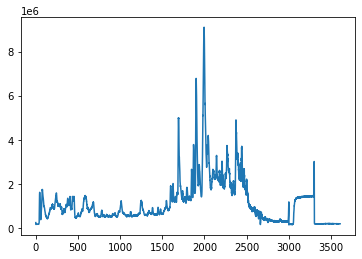

In [104]:
plt.plot(tic['rt'], [x.sum() for x in tic['i']])

In [130]:
xic = getXIC(174.130388, 31.199694*60, tic, type='TI', ppm=15)

In [136]:
31.199694*60

1871.98164

In [131]:
len(xic['rt'])

34

In [132]:
len(xic['mz'])

34

In [133]:
len(xic['i'])

34

In [134]:
len(xic['xic'])

34

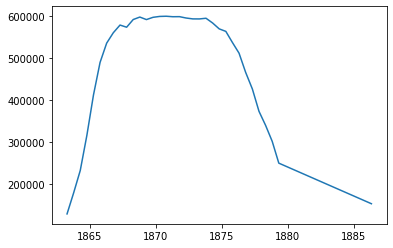

In [128]:
plt.plot(xic['rt'], xic['i'])

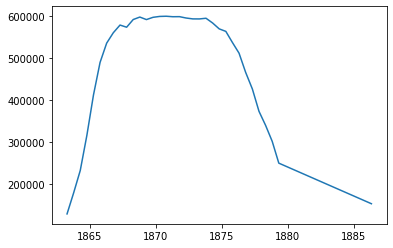

In [135]:
plt.plot(xic['rt'], xic['xic'])

In [138]:
plotXIC(174.130388, 31.199694*60, exp, '010_1_ORIG_XIC', title='', type='XIC', format='png')

In [147]:
plotXIC(174.130388, 31.199694*60, exp, out='010_1_ORIG_BPC', title='', type='BPC', format='png')

ok


In [141]:
plotXIC(174.130388, 31.199694*60, exp, '010_1_ORIG_BPC_XIC', title='', type='BPC_XIC', format='png')

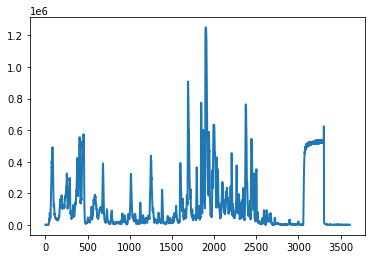

In [144]:
fig = plt.figure() 
ax1 = fig.add_subplot(111) 
ax1.plot(tic['rt'], [max(x) if len(x) else 0 for x in tic['i']], lw=2)
fig.savefig('010_1_ORIG_BPC.png')

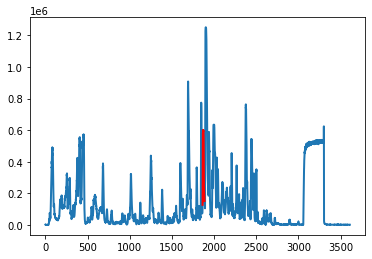

In [148]:
fig = plt.figure() 
ax1 = fig.add_subplot(111) 
ax1.plot(tic['rt'], [max(x) if len(x) else 0 for x in tic['i']], lw=2) 
ax1.plot(xic['rt'], xic['xic'], lw=2, color='r')